In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
# Read CSV file, skipping first 3 rows and treating row 4 as data (no header)
df = pd.read_csv('sen.csv', skiprows=3, header=None)

# Initialize column names list with borough identifiers
columns = ['code', 'new_code', 'borough']

# Define the range of years in the dataset
years = range(2002, 2020)

# Build column names by appending metric_year format for each year
# Creates patterns like: total_pupils_2002, statements_2002, pct_2002, etc.
for year in years:
    columns.extend([f'total_pupils_{year}', f'statements_{year}', f'pct_{year}'])

# Assign the constructed column names to the dataframe
df.columns = columns

# Display first 5 rows to verify structure
df.head()


,code,new_code,borough,total_pupils_2002,statements_2002,pct_2002,total_pupils_2003,statements_2003,pct_2003,total_pupils_2004,...,pct_2016,total_pupils_2017,statements_2017,pct_2017,total_pupils_2018,statements_2018,pct_2018,total_pupils_2019,statements_2019,pct_2019
0,00AA,E09000001,City of London,"1,734",0,0.0,"1,957",x,x,"2,104",...,0.3,"2,376",105,4.4,"2,382",9,0.4,"2,428",6,0.2
1,00AB,E09000002,Barking and Dagenham,"30,349",859,2.8,"30,642",877,2.9,"30,954",...,2.2,"42,944","1,012",2.4,"43,506","1,092",2.5,"43,916","1,178",2.7
2,00AC,E09000003,Barnet,"54,404","1,457",2.7,"54,282","1,443",2.7,"54,535",...,2.6,"64,752","1,763",2.7,"65,789","1,851",2.8,"66,962","2,016",3.0
3,00AD,E09000004,Bexley,"41,128","1,127",2.7,"41,332","1,227",3.0,"41,555",...,2.6,"44,815","1,146",2.6,"44,498","1,204",2.7,"44,624","1,334",3.0
4,00AE,E09000005,Brent,"39,976","1,148",2.9,"41,916","1,131",2.7,"42,521",...,3.0,"51,262","1,558",3.0,"51,308","1,603",3.1,"51,167","1,639",3.2


In [27]:
# Clean and convert data
df = df.replace('x', pd.NA).replace(',', '', regex=True)

# Convert numeric columns
for col in df.columns[3:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if 'Statements_' in col:
        df[col] = df[col].astype('Int64')

# drop code and new code 
df = df.drop(columns=['code', 'new_code'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   borough            33 non-null     object 
 1   total_pupils_2002  33 non-null     int64  
 2   statements_2002    33 non-null     int64  
 3   pct_2002           33 non-null     float64
 4   total_pupils_2003  33 non-null     int64  
 5   statements_2003    32 non-null     float64
 6   pct_2003           32 non-null     float64
 7   total_pupils_2004  33 non-null     int64  
 8   statements_2004    33 non-null     int64  
 9   pct_2004           33 non-null     float64
 10  total_pupils_2005  33 non-null     int64  
 11  statements_2005    33 non-null     int64  
 12  pct_2005           33 non-null     float64
 13  total_pupils_2006  33 non-null     int64  
 14  statements_2006    33 non-null     int64  
 15  pct_2006           33 non-null     float64
 16  total_pupils_2007  33 non-nu

,borough,total_pupils_2002,statements_2002,pct_2002,total_pupils_2003,statements_2003,pct_2003,total_pupils_2004,statements_2004,pct_2004,...,pct_2016,total_pupils_2017,statements_2017,pct_2017,total_pupils_2018,statements_2018,pct_2018,total_pupils_2019,statements_2019,pct_2019
0,City of London,1734,0,0.0,1957,NaN,NaN,2104,7,0.3,...,0.3,2376,105,4.4,2382,9,0.4,2428,6,0.2
1,Barking and Dagenham,30349,859,2.8,30642,877.0,2.9,30954,921,3.0,...,2.2,42944,1012,2.4,43506,1092,2.5,43916,1178,2.7
2,Barnet,54404,1457,2.7,54282,1443.0,2.7,54535,1358,2.5,...,2.6,64752,1763,2.7,65789,1851,2.8,66962,2016,3.0
3,Bexley,41128,1127,2.7,41332,1227.0,3.0,41555,1295,3.1,...,2.6,44815,1146,2.6,44498,1204,2.7,44624,1334,3.0
4,Brent,39976,1148,2.9,41916,1131.0,2.7,42521,1144,2.7,...,3.0,51262,1558,3.0,51308,1603,3.1,51167,1639,3.2


In [44]:
# convert to long format
df_long = pd.wide_to_long(
    df.reset_index(),
    stubnames=['total_pupils', 'statements', 'pct'],
    i='borough',
    j='year',
    sep='_',
    suffix=r'\d+').reset_index()
df_long['year'] = pd.to_datetime(df_long['year'], format='%Y')
df_long.info()
df_long.head(100)

# '''
# **What this does:**
# - `stubnames` - matches your lowercase column prefixes
# - `i='borough'` - the identifier column
# - `j='year'` - creates the new year column from the suffixes
# - `sep='_'` - splits on underscore
# - `suffix=r'\d+'` - extracts the year numbers
# - `.reset_index()` - converts borough and year from index back to regular columns
# '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   borough       594 non-null    object        
 1   year          594 non-null    datetime64[ns]
 2   index         594 non-null    int64         
 3   total_pupils  594 non-null    int64         
 4   statements    593 non-null    float64       
 5   pct           593 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 28.0+ KB


,borough,year,index,total_pupils,statements,pct
0,City of London,2002-01-01,0,1734,0.0,0.0
1,Barking and Dagenham,2002-01-01,1,30349,859.0,2.8
2,Barnet,2002-01-01,2,54404,1457.0,2.7
3,Bexley,2002-01-01,3,41128,1127.0,2.7
4,Brent,2002-01-01,4,39976,1148.0,2.9
...,...,...,...,...,...,...
95,Tower Hamlets,2004-01-01,29,38599,1373.0,3.6
96,Waltham Forest,2004-01-01,30,37860,1346.0,3.6
97,Wandsworth,2004-01-01,31,38141,1392.0,3.6
98,Westminster,2004-01-01,32,26793,625.0,2.3


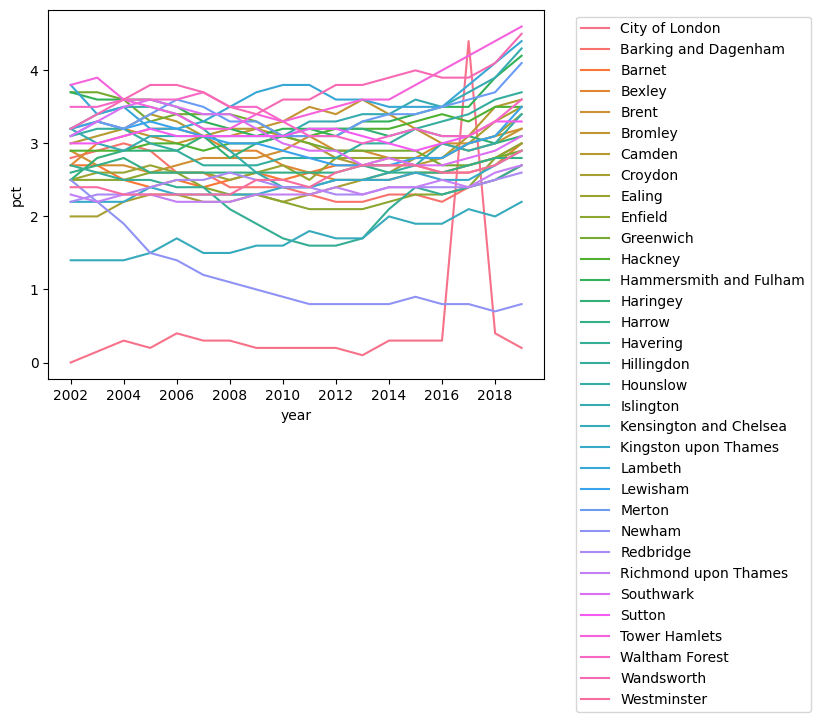

In [45]:
figplot = sns.lineplot(data=df_long, x='year', y='pct', hue='borough')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [52]:
df_16_17 = df_long[df_long['year'].dt.year.isin([2016, 2017])].pivot(index='borough', columns='year', values='pct').reset_index()
df_16_17['pct_change'] = df_16_17[pd.to_datetime('2017-01-01')] - df_16_17[pd.to_datetime('2016-01-01')]
df_16_17 = df_16_17.sort_values(by='pct_change', ascending=False)
df_16_17

year,borough,2016-01-01 00:00:00,2017-01-01 00:00:00,pct_change
6,City of London,0.3,4.4,4.1
5,Camden,2.8,3.1,0.3
21,Lambeth,3.5,3.8,0.3
29,Tower Hamlets,4.0,4.2,0.2
7,Croydon,2.8,3.0,0.2
8,Ealing,2.8,3.0,0.2
22,Lewisham,2.8,3.0,0.2
19,Kensington and Chelsea,1.9,2.1,0.2
18,Islington,3.5,3.7,0.2
0,Barking and Dagenham,2.2,2.4,0.2


In [53]:
df_city = df_long[df_long['borough'] == 'City of London']
df_city

,borough,year,index,total_pupils,statements,pct
0,City of London,2002-01-01,0,1734,0.0,0.0
33,City of London,2003-01-01,0,1957,NaN,NaN
66,City of London,2004-01-01,0,2104,7.0,0.3
99,City of London,2005-01-01,0,2144,5.0,0.2
132,City of London,2006-01-01,0,2134,8.0,0.4
165,City of London,2007-01-01,0,2207,7.0,0.3
198,City of London,2008-01-01,0,2238,6.0,0.3
231,City of London,2009-01-01,0,2235,5.0,0.2
264,City of London,2010-01-01,0,2260,4.0,0.2
297,City of London,2011-01-01,0,2295,4.0,0.2


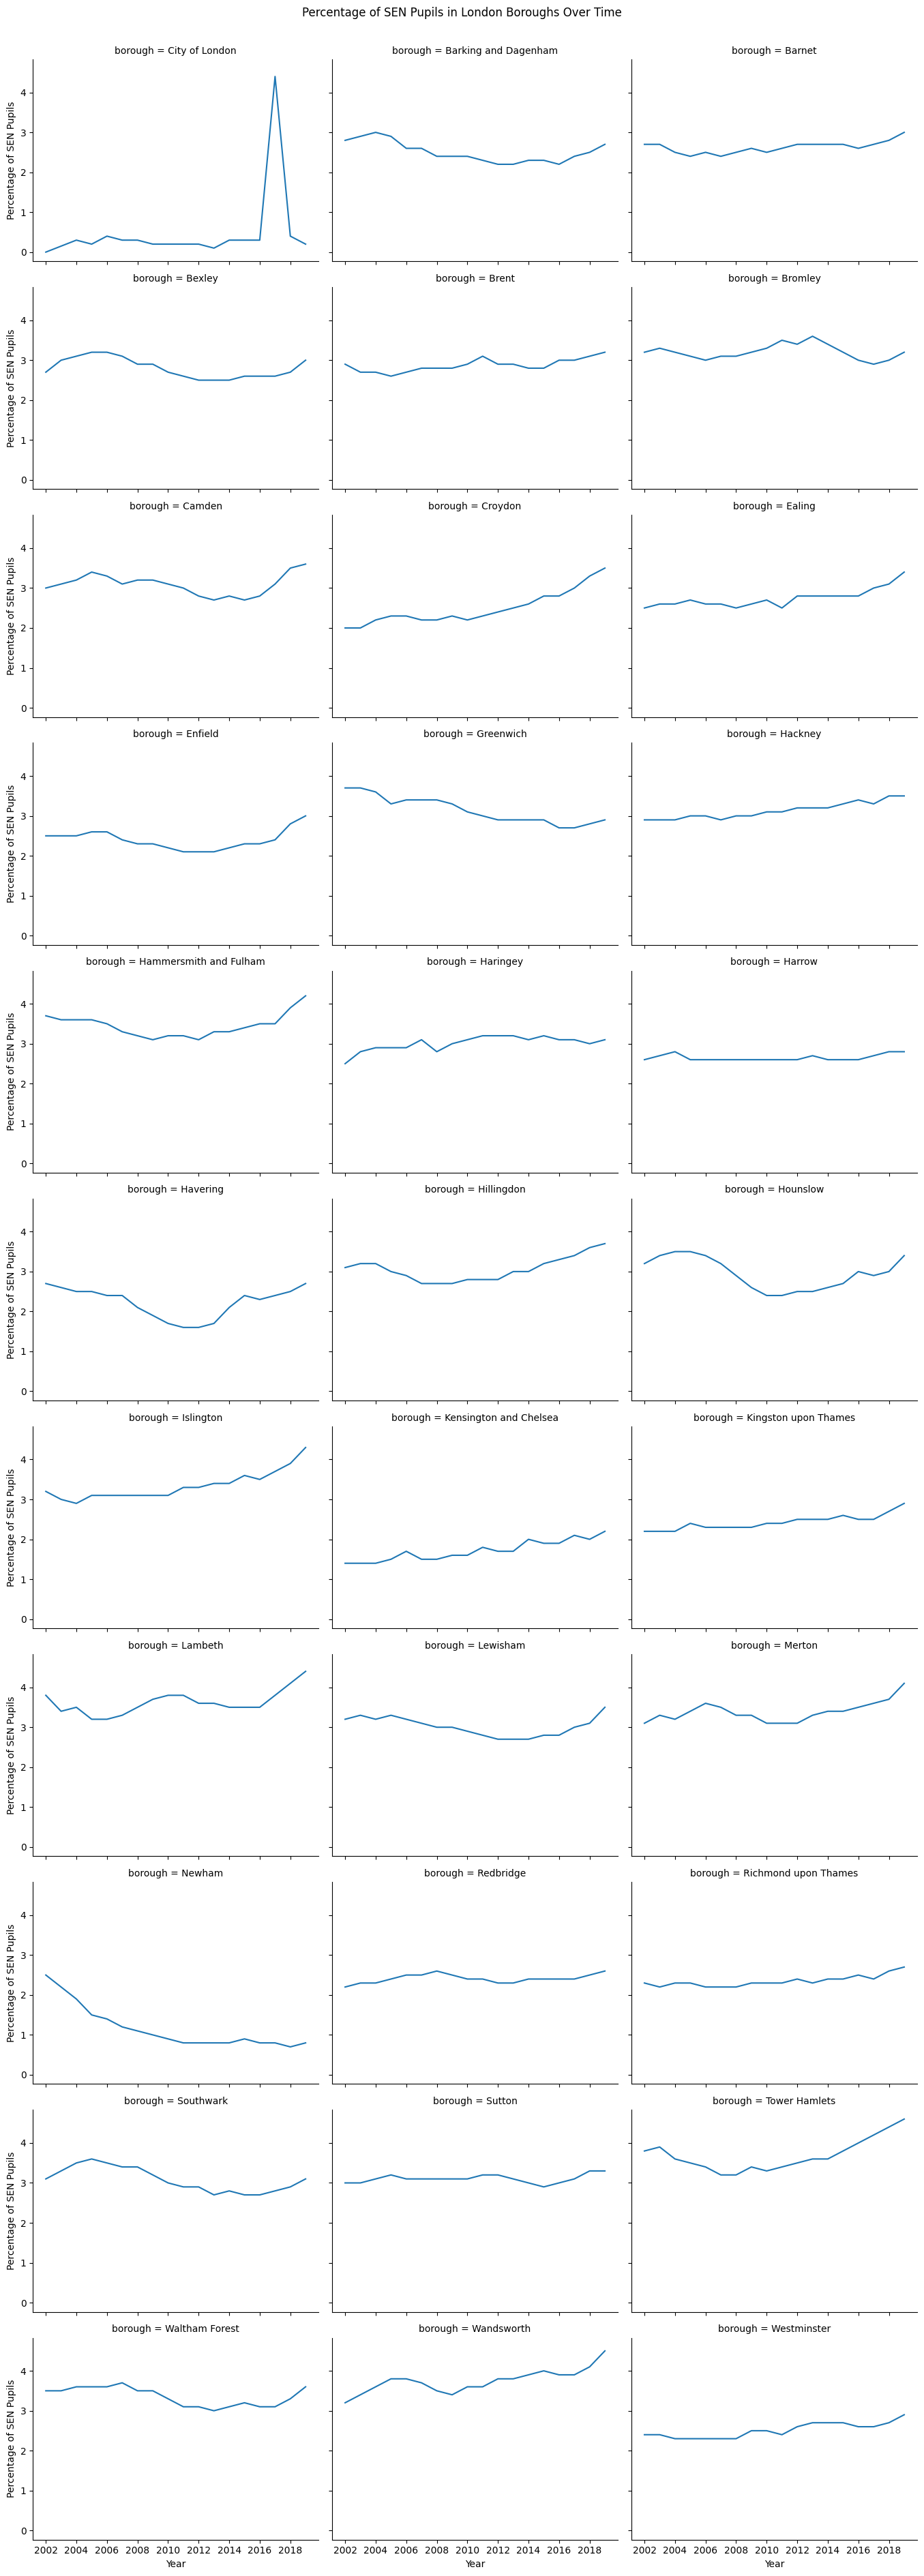

In [87]:
figplot = sns.relplot(data=df_long, x='year', y='pct', col='borough', kind='line', col_wrap=3, height=3.5, aspect=1.3, facet_kws={'subplot_kws': {'xlabel': 'Year'}})
figplot.figure.suptitle("Percentage of SEN Pupils in London Boroughs Over Time")
figplot.figure.subplots_adjust(top=0.96)
figplot.set_axis_labels("Year", "Percentage of SEN Pupils")

